In [91]:
import pandas as pd
import geopandas as gpd

In [92]:
bikes = pd.read_csv('Bike_Collisions_2009-2013.csv')

In [93]:
type(bikes)

pandas.core.frame.DataFrame

In [94]:
bikes.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10526 entries, 0 to 10525
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   X                        10426 non-null  float64
 1   Y                        10426 non-null  float64
 2   FID                      10526 non-null  int64  
 3   CASE_ID                  10526 non-null  int64  
 4   ACCIDENT_YEAR            10526 non-null  int64  
 5   PROCDATE                 10526 non-null  object 
 6   JURIS                    10526 non-null  int64  
 7   COLLISION_DATE           10526 non-null  object 
 8   COLLISION_TIME           10526 non-null  int64  
 9   OFFICER_ID               10518 non-null  object 
 10  REPORTING_DISTRICT       10267 non-null  object 
 11  DAY_OF_WEEK              10526 non-null  int64  
 12  SHIFT                    10526 non-null  int64  
 13  POPULATION               10526 non-null  int64  
 14  CNTY_CITY_LOC         

/tmp/ipykernel_481/1105019264.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  bikes.info(verbose=True, null_counts=True)


In [95]:
bikes[['X', 'Y', 'ACCIDENT_YEAR','COLLISION_DATE', 'COLLISION_TIME', 'COUNT_BICYCLIST_KILLED', 'COUNT_BICYCLIST_INJURED']]

,X,Y,ACCIDENT_YEAR,COLLISION_DATE,COLLISION_TIME,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED
0,-118.601602,34.206749,2009,1/1/2009,1500,0,1
1,-118.247680,34.054989,2009,1/2/2009,1315,0,1
2,-118.542762,34.186565,2009,1/2/2009,515,0,1
3,-118.448752,34.172115,2009,1/2/2009,1525,0,1
4,-118.536055,34.180725,2009,1/2/2009,1130,0,1
...,...,...,...,...,...,...,...
10521,-118.313550,34.076229,2013,12/30/2013,1750,0,1
10522,-118.405262,34.171959,2013,12/31/2013,1305,0,1
10523,-118.575350,34.193790,2013,12/31/2013,1105,0,1
10524,-118.421338,34.315365,2013,12/31/2013,1315,0,1


In [96]:
trimmed = ['X', 'Y', 'ACCIDENT_YEAR', 'COLLISION_DATE', 'COLLISION_TIME', 'COUNT_BICYCLIST_KILLED', 'COUNT_BICYCLIST_INJURED']

In [97]:
bikes[trimmed].head(10)

,X,Y,ACCIDENT_YEAR,COLLISION_DATE,COLLISION_TIME,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED
0,-118.601602,34.206749,2009,1/1/2009,1500,0,1
1,-118.247680,34.054989,2009,1/2/2009,1315,0,1
2,-118.542762,34.186565,2009,1/2/2009,515,0,1
3,-118.448752,34.172115,2009,1/2/2009,1525,0,1
4,-118.536055,34.180725,2009,1/2/2009,1130,0,1
5,-118.445609,34.059052,2009,1/2/2009,910,0,1
6,-118.259582,34.049191,2009,1/3/2009,1440,0,1
7,-118.300376,34.063557,2009,1/3/2009,2230,0,1
8,-118.257360,34.076759,2009,1/3/2009,142,0,1
9,-118.283463,34.049557,2009,1/4/2009,1705,0,1


In [98]:
bikes = bikes[trimmed].copy()

In [99]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10526 entries, 0 to 10525
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   X                        10426 non-null  float64
 1   Y                        10426 non-null  float64
 2   ACCIDENT_YEAR            10526 non-null  int64  
 3   COLLISION_DATE           10526 non-null  object 
 4   COLLISION_TIME           10526 non-null  int64  
 5   COUNT_BICYCLIST_KILLED   10526 non-null  int64  
 6   COUNT_BICYCLIST_INJURED  10526 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 575.8+ KB


In [100]:
bikes_gdf = gpd.GeoDataFrame(
    bikes, geometry=gpd.points_from_xy(bikes.X, bikes.Y))

In [101]:
type(bikes_gdf)

geopandas.geodataframe.GeoDataFrame

In [102]:
bikes_gdf=bikes_gdf.dropna(subset=['X'])
bikes_gdf=bikes_gdf.dropna(subset=['Y'])
bikes_gdf=bikes_gdf[bikes_gdf.X != 0]
bikes_gdf=bikes_gdf[bikes_gdf.Y != 0]
bikes_gdf=bikes_gdf[bikes_gdf.ACCIDENT_YEAR == 2009]

<AxesSubplot:>

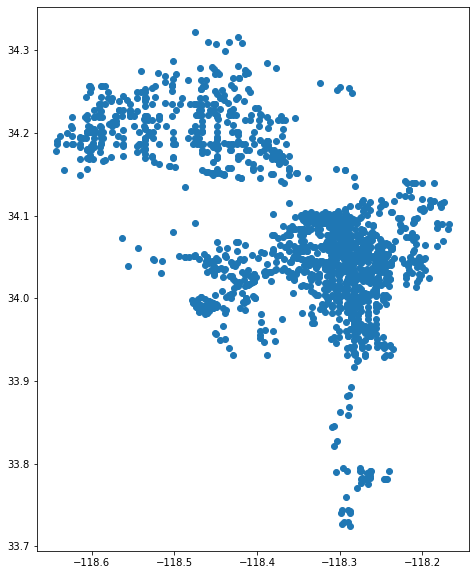

In [103]:
bikes_gdf.plot(figsize=(10,10))

In [112]:
bikes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1698 entries, 0 to 1808
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   X                        1698 non-null   float64 
 1   Y                        1698 non-null   float64 
 2   ACCIDENT_YEAR            1698 non-null   int64   
 3   COLLISION_DATE           1698 non-null   object  
 4   COLLISION_TIME           1698 non-null   int64   
 5   COUNT_BICYCLIST_KILLED   1698 non-null   int64   
 6   COUNT_BICYCLIST_INJURED  1698 non-null   int64   
 7   geometry                 1698 non-null   geometry
dtypes: float64(2), geometry(1), int64(4), object(1)
memory usage: 119.4+ KB


In [125]:
import folium

In [126]:
lat = bikes_gdf.Y.mean()
long = bikes_gdf.X.mean()

In [127]:
m = folium.Map(location=[lat,long])
m

In [128]:
for index, row in bikes_gdf.iterrows():
    if index==200:
        break
    folium.Marker([row.Y, row.X], popup=row.COLLISION_DATE, tooltip=row.COLLISION_DATE).add_to(m)
m

In [129]:
m.save("2009_bike_injuries.html")